# All pre-processing code taken from Nick Wan's notebook [here](https://www.kaggle.com/code/nickwan/calculate-distance-between-players-football)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from tqdm.notebook import tqdm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2024/players.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2024/games.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2024/tackles.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2024/plays.csv
/kaggle/input/nfl-big-data-bowl-2024/tracking_week_2.csv


In [2]:
project_dir = '/kaggle/input/nfl-big-data-bowl-2024'
os.listdir(project_dir)

['players.csv',
 'tracking_week_7.csv',
 'tracking_week_9.csv',
 'tracking_week_6.csv',
 'games.csv',
 'tracking_week_8.csv',
 'tracking_week_4.csv',
 'tracking_week_3.csv',
 'tackles.csv',
 'tracking_week_5.csv',
 'tracking_week_1.csv',
 'plays.csv',
 'tracking_week_2.csv']

In [3]:
_players = pd.read_csv(f"{project_dir}/players.csv")

_week = pd.read_csv(f"{project_dir}/tracking_week_1.csv")

_week = _week.merge(_players.loc[:,['nflId','position']],how='left')
_week.shape

(1407439, 18)

In [4]:
gid = 2022091103
_game = _week.loc[_week['gameId'] == gid].copy()
_game.shape

(91080, 18)

In [5]:
df = pd.DataFrame()
for pid in tqdm(_game['playId'].unique(),leave=True):
    play = _game.loc[_game['playId'] == pid].copy()
    
    for fid in tqdm(play['frameId'].unique(),leave=False):
        frame = play.loc[play['frameId'] == fid].copy()
        frame['pos_unique'] = (frame['position']
                              .add(frame
                                   .groupby('position',as_index=False)
                                  .cumcount()
                                  .add(1)
                                  .dropna()
                                  .astype(str)
                                  .str.replace('.0','',regex=False)
                                  .str.replace('0','',regex=False)))
    
        _df = (pd.DataFrame(cdist(frame.loc[:,['x','y']],
                                 frame.loc[:,['x','y']]),
                           index=frame['nflId'],
                           columns=frame['pos_unique'].fillna('football')))
    
        _df = _df.reset_index()
    
        frame = frame.merge(_df)
    
        df = pd.concat([df,frame])

  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/68 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

In [6]:
_tackles = pd.read_csv(f"{project_dir}/tackles.csv")
_tackles = _tackles.drop(columns={'forcedFumble'})
_tackles['tackle'].value_counts()

tackle
1    9919
0    7507
Name: count, dtype: int64

In [7]:
df = df.merge(_tackles,on=['gameId','playId','nflId'],how='left')
df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'position', 'pos_unique', 'CB1', 'SS1', 'NT1', 'CB2',
       'QB1', 'CB3', 'DE1', 'G1', 'FS1', 'DT1', 'DE2', 'T1', 'C1', 'WR1',
       'OLB1', 'WR2', 'ILB1', 'G2', 'RB1', 'TE1', 'T2', 'WR3', 'football',
       'DT2', 'ILB2', 'OLB2', 'FS2', 'FB1', 'NT2', 'TE2', 'T3', 'SS2', 'G3',
       'DE3', 'CB4', 'tackle', 'assist', 'pff_missedTackle'],
      dtype='object')

In [8]:
df.loc[(df['event'] != 'tackle') & (df['tackle'] == 1),'tackle'] = 0
df.loc[(df['gameId'] == 2022091103) & (df['playId'] == 764) & (df['displayName'] == 'Markus Bailey'),['frameId','playId','displayName','event','tackle']].head(50)

,frameId,playId,displayName,event,tackle
13931,1,764,Markus Bailey,NaN,0.0
13954,2,764,Markus Bailey,NaN,0.0
13977,3,764,Markus Bailey,NaN,0.0
14000,4,764,Markus Bailey,NaN,0.0
14023,5,764,Markus Bailey,NaN,0.0
14046,6,764,Markus Bailey,ball_snap,0.0
14069,7,764,Markus Bailey,NaN,0.0
14092,8,764,Markus Bailey,NaN,0.0
14115,9,764,Markus Bailey,NaN,0.0
14138,10,764,Markus Bailey,NaN,0.0


# It seems like one of the most important things for calculating tackle probability is having a feature indicating whether someone is a member of the defense to help the model better classify whether a player that is closer would increase or decrease the expected tackle probability. The tricky thing to deal with seems like it may be the tackles.

In [9]:
_plays = pd.read_csv(f"{project_dir}/plays.csv")

df = df.merge(_plays,on=['gameId','playId'],how='left')
df.head()

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPoints,expectedPointsAdded,foulName1,foulName2,foulNFLId1,foulNFLId2
0,2022091103,58,43299.0,Eli Apple,1,2022-09-11 13:04:14.200000,20.0,CIN,right,37.48,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN
1,2022091103,58,43350.0,Vonn Bell,1,2022-09-11 13:04:14.200000,24.0,CIN,right,42.74,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN
2,2022091103,58,43455.0,D.J. Reader,1,2022-09-11 13:04:14.200000,98.0,CIN,right,36.64,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN
3,2022091103,58,43641.0,Mike Hilton,1,2022-09-11 13:04:14.200000,21.0,CIN,right,38.08,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN
4,2022091103,58,44814.0,Mitchell Trubisky,1,2022-09-11 13:04:14.200000,10.0,PIT,right,30.05,...,0.777446,0.222554,0.007068,-0.007068,1.298699,-0.472126,NaN,NaN,NaN,NaN


In [10]:
dropped_columns = ['time','jerseyNumber','yardlineSide','yardlineNumber','preSnapHomeScore','preSnapVisitorScore','passResult','passLength','penaltyYards','playResult','passProbability','preSnapHomeTeamWinProbability','preSnapVisitorTeamWinProbability','homeTeamWinProbabilityAdded','expectedPoints','expectedPointsAdded','foulName1','foulName2','foulNFLId1','foulNFLId2']
df.drop(labels=dropped_columns,axis=1,inplace=True)
df.columns

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'club',
       'playDirection', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event',
       'position', 'pos_unique', 'CB1', 'SS1', 'NT1', 'CB2', 'QB1', 'CB3',
       'DE1', 'G1', 'FS1', 'DT1', 'DE2', 'T1', 'C1', 'WR1', 'OLB1', 'WR2',
       'ILB1', 'G2', 'RB1', 'TE1', 'T2', 'WR3', 'football', 'DT2', 'ILB2',
       'OLB2', 'FS2', 'FB1', 'NT2', 'TE2', 'T3', 'SS2', 'G3', 'DE3', 'CB4',
       'tackle', 'assist', 'pff_missedTackle', 'ballCarrierId',
       'ballCarrierDisplayName', 'playDescription', 'quarter', 'down',
       'yardsToGo', 'possessionTeam', 'defensiveTeam', 'gameClock',
       'prePenaltyPlayResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'visitorTeamWinProbilityAdded'],
      dtype='object')

In [11]:
defensive_players = ['CB1','SS1','CB2','CB3','DE1','FS1','DT1', 'DE2','OLB1','ILB1','DT2','ILB2','OLB2','FS2','SS2','DE3','CB4','T1','T2','T3']
df.loc[:,'is_defense'] = 0
df.loc[(df['pos_unique'].isin(defensive_players)), 'is_defense'] = 1
df[['displayName','club','possessionTeam','pos_unique','is_defense']].sample(50)

,displayName,club,possessionTeam,pos_unique,is_defense
24928,Pat Freiermuth,PIT,PIT,TE1,0
15863,Malik Reed,PIT,CIN,OLB1,1
59807,Larry Ogunjobi,PIT,CIN,DT1,1
62840,Mike Thomas,CIN,CIN,WR2,0
12877,Pat Freiermuth,PIT,PIT,TE1,0
28480,T.J. Watt,PIT,CIN,OLB1,1
433,Pat Freiermuth,PIT,PIT,TE1,0
37044,Jonah Williams,CIN,CIN,T2,1
26328,Chase Claypool,PIT,PIT,WR2,0
16543,Ahkello Witherspoon,PIT,CIN,CB1,1


In [12]:
#Functions to reverse left play direction. Makes all plays go right to left. 
def reverse_deg(deg):
    if deg < 180:
        return deg + 180
    if deg >= 180:
        return deg - 180
    
def reverse_play_direction(df: pd.DataFrame):
    result_df = df.copy(deep=True)
    result_df['o'] = result_df['o'].apply(reverse_deg)
    result_df['dir'] = result_df['dir'].apply(reverse_deg)
    result_df['x'] = result_df['x'].apply(lambda x: 120 - x)
    result_df['y'] = result_df['y'].apply(lambda y: 160/3 - y)
    return result_df

In [13]:
#Double check this. Run classification may not be optimal.
df['playType'] = 0
df.loc[df['playDescription'].str.contains('pass'),'playType'] = 'pass'
df.loc[df['playDescription'].str.contains('scramble'),'playType'] = 'scramble'
df.loc[~((df['playDescription'].str.contains('pass')) | (df['playDescription'].str.contains('scramble'))),'playType'] = 'run'
df[['playDescription','playType']].sample(50)
df.groupby('playType',as_index=False)['prePenaltyPlayResult'].describe()


,playType,count,mean,std,min,25%,50%,75%,max
0,pass,30820.0,10.909701,8.671593,0.0,5.0,9.0,14.0,32.0
1,run,53774.0,4.083405,6.179950,-4.0,1.0,3.0,5.0,31.0
2,scramble,6486.0,9.333333,7.239800,2.0,5.0,6.0,9.0,23.0


In [14]:
#Total percentage of plays in week 1 resulting in tackle for loss
print(f"Total percent of week 1 plays resulting in TFL: {(df.loc[df['prePenaltyPlayResult']<0].shape[0])/df.shape[0]}")
print(f"Total percent of week 1 pass plays resulting in TFL: {(df.loc[(df['prePenaltyPlayResult']<0) & (df['playType'] == 'pass')].shape[0])/df.loc[df['playType']=='pass'].shape[0]}")
print(f"Total percent of week 1 run plays resulting in TFL: {(df.loc[(df['prePenaltyPlayResult']<0) & (df['playType'] == 'run')].shape[0])/df.loc[df['playType']=='run'].shape[0]}")
print(f"Total percent of week 1 scramble plays resulting in TFL: {(df.loc[(df['prePenaltyPlayResult']<0) & (df['playType'] == 'scramble')].shape[0])/df.loc[df['playType']=='scramble'].shape[0]}")

Total percent of week 1 plays resulting in TFL: 0.075
Total percent of week 1 pass plays resulting in TFL: 0.0
Total percent of week 1 run plays resulting in TFL: 0.1270316509837468
Total percent of week 1 scramble plays resulting in TFL: 0.0


In [15]:
df['tackled_for_loss'] = 0
df.loc[(df['prePenaltyPlayResult']<0) & (df['event']=='tackle') & (df['tackle']==1),'tackled_for_loss'] = 1

In [16]:
#Removed the _play_df dataframe, need to update this. 
#_play_df_ball_carrier_dir = _play_df.loc[_play_df['ballCarrierDisplayName'] == _play_df['displayName'],['frameId','dir','o']]
#_play_df_ball_carrier_dir.rename(columns={'dir':'ballCarrierDir','o':'ballCarrierO'},inplace=True)

In [17]:
#_play_df = _play_df.merge(_play_df_ball_carrier_dir,on='frameId',how='left')
#_play_df.head(50)

In [18]:
#_play_df.loc[0,'playDescription']

# Thoughts (11/12)

Today I played around with some feature engineering. My current thought process is that some of the biggest changes I would expect immediately preceding/during a tackle, particularly a tackle for loss, is:
- we should see generally see a more rapid acceleration of the ball carrier as they try to evade by quickly changing direction
- we may see the ball carriers orientation shift either towards or away from the tackler as they become more aware of the threat
- we may see the direction of travel adopt more orthogonal angles of travel according to `dir` as they attempt to evade
- there's a possibility that `o` and `dir` are unique features that may be important; it's also possible that they tell more unique information about TFLs becuase of their relationship

Based on these thoughts, I tried calculating a few different features:
- `AOD` which is the product of acceleration and orientation differences divided by the directional differences 
- `OD_diff`, which is the ratio of the differences between the player and the ball carrier's orientation and their direction of travel

I also think I need to rethink the calculation of `tackled_for_loss`, as it currently is assigning a yes value to all plays in which the play result is a loss of yardage, where it needs to assign the value of 1 to individuals credited with a tackle resulting in a loss of yardage in a particular frame.

Other thoughts:
- I'm not sure that I calculated `playType` correctly. I classified plays as either 'pass' or 'scramble' based on whether those words appeared in the `playDescription`, then classified all other plays as 'run'.


In [19]:
_df = df.copy()

In [20]:
_df['tackled_for_loss'] = 0
_df.loc[((_df['event'] == 'tackle') & (_df['tackle'] == 1) & (_df['prePenaltyPlayResult']<0)),'tackled_for_loss'] = 1
_df.loc[(_df['event']=='tackle') & (_df['tackle']==1),['event','tackle','prePenaltyPlayResult','tackled_for_loss']].sample(50)

,event,tackle,prePenaltyPlayResult,tackled_for_loss
84188,tackle,1.0,2,0
69429,tackle,1.0,11,0
77892,tackle,1.0,2,0
25487,tackle,1.0,4,0
36676,tackle,1.0,5,0
39423,tackle,1.0,1,0
78433,tackle,1.0,5,0
51939,tackle,1.0,6,0
5990,tackle,1.0,0,0
76597,tackle,1.0,14,0


# What I want to get done today

- I want to try converting all plays to right-left scheme (in accordance with Colin Lagator's notebook [here](https://www.kaggle.com/code/colinlagator/make-all-plays-left-right)
- I want to calculate STRAIN for all week 1 data
- I want to try calculating a version of STRAIN that's based on acceleration instead of velocity
- I want to look at both values and how they change over the course of the two plays I've identified

In [21]:
#_play_df_left = _play_df[_play_df['playDirection'] == 'left']
#_play_df_left_reversed = reverse_play_direction(_play_df_left)
#_play_df_left.head(15)

# playId == 58 & playId == 764

# Calculating STRAIN and aSTRAIN

- Because tackles for losses occur almost exclusively on running plays, very rarely are players going to have the chance to reach high velocities in the direction of the ballcarrier. Therefore, when predicting TFLs on run plays, it's possible that acceleration towards the ballcarrier may be more important than velocity. Therefore, I want to calculate STRAIN according to the github repo (include link), but I also want to create an adapted aSTRAIN based on the v_ball metric that will assess changes in acceleration expressed relative to the distance to the ball carrier. 

In [22]:
# standardize field, refactored from the STRAIN git repo  
df.loc[df['playDirection']=='left', 'x'] = 120-df.loc[df['playDirection']=='left', 'x']
df.loc[df['playDirection']=='left', 'y'] = (160/3)-df.loc[df['playDirection']=='left', 'y']
df.loc[df['playDirection']=='left', 'dir'] = df.loc[df['playDirection']=='left', 'dir']+180
df.loc[df['dir']>360, 'dir'] = df.loc[df['dir']>360, 'dir']-360 
df.loc[df['playDirection']=='left', 'o'] = df.loc[df['playDirection']=='left', 'o']+180
df.loc[df['o']>360, 'o'] = df.loc[df['o']>360, 'o']-360 

# define start and end events, so we are not calculating strain pre-snap or post-end-of-play  
start_events = ['autoevent_ballsnap', 'ball_snap']
end_events = ['fumble', 'fumble_defense_recovered', 'fumble_offense_recovered',
              'qb_sack', 'qb_slide', 'tackle', 'touchdown']

# define start and end frames  
df['is_start'] = 0  
df.loc[df['event'].isin(start_events), 'is_start'] = 1  

df['is_end'] = 0  
df.loc[df['event'].isin(end_events), 'is_end'] = 1  

frame_start, frame_end = df.loc[df['is_start']==1, 'frameId'].unique()[0], df.loc[df['is_end']==1, 'frameId'].unique()[0]
# subset data to desired frames  
df = df.loc[df['frameId'].between(frame_start, frame_end)].copy()

# calculate velocity and acceleration towards the ball
df['v_ball'] = -1.0*(df.loc[:,'football'].sub(df.loc[:,'football'].shift())).div(0.1)
df['a_ball'] = -1.0*(df.loc[:,'v_ball'].sub(df.loc[:,'v_ball'].shift())).div(0.1)
# create a player ID check, so we don't assign STRAIN values to incorrect players  
df['_shift'] = df.loc[:,'nflId'].shift()
#df.loc[df['nflId']!=df['_shift'], ['v_ball','a_ball']] = np.nan

# calculate STRAIN
df['strain'] = df['v_ball'].div(df['football'])
df['a_strain'] = df['a_ball'].div(df['football'])
# drop helper columns that are no longer necessary  
df = df.drop(['_shift', 'is_start', 'is_end'], axis=1)

In [23]:
_play58 = df.loc[(df['gameId'] == 2022091103) & (df['playId'] == 58)]
_play764 = df.loc[(df['gameId'] == 2022091103) & (df['playId'] == 764)]

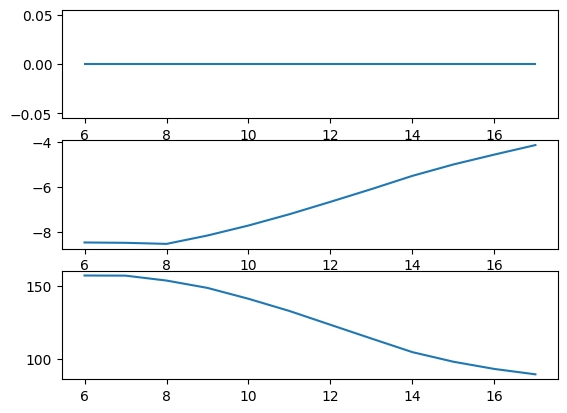

In [24]:
#Markus Bailey and Najee Harris (play 764)
_play764_tackler = _play764.loc[_play764['displayName'] == 'Markus Bailey']
fig,ax = plt.subplots(3,1)
ax[0].plot(_play764_tackler['frameId'],_play764_tackler['tackle'])
ax[1].plot(_play764_tackler['frameId'],_play764_tackler['strain'])
ax[2].plot(_play764_tackler['frameId'],_play764_tackler['a_strain'])

In [25]:
_play764_tackler

,gameId,playId,nflId,displayName,frameId,club,playDirection,x,y,s,...,offenseFormation,defendersInTheBox,visitorTeamWinProbilityAdded,is_defense,playType,tackled_for_loss,v_ball,a_ball,strain,a_strain
14046,2022091103,764,52623.0,Markus Bailey,6,CIN,right,109.35,18.01,0.02,...,JUMBO,11.0,-0.041647,1,run,0,-54.285214,1008.771547,-8.464466,157.293530
14069,2022091103,764,52623.0,Markus Bailey,7,CIN,right,109.34,18.01,0.16,...,JUMBO,11.0,-0.041647,1,run,0,-54.366777,1007.925831,-8.479421,157.203136
14092,2022091103,764,52623.0,Markus Bailey,8,CIN,right,109.31,18.02,0.43,...,JUMBO,11.0,-0.041647,1,run,0,-57.336221,1034.208174,-8.527326,153.812541
14115,2022091103,764,52623.0,Markus Bailey,9,CIN,right,109.23,18.04,0.94,...,JUMBO,11.0,-0.041647,1,run,0,-54.671710,997.153686,-8.154962,148.737817
14138,2022091103,764,52623.0,Markus Bailey,10,CIN,right,109.11,18.07,1.46,...,JUMBO,11.0,-0.041647,1,run,0,-51.845135,949.658226,-7.710433,141.233614
14161,2022091103,764,52623.0,Markus Bailey,11,CIN,right,108.94,18.13,1.95,...,JUMBO,11.0,-0.041647,1,run,0,-48.191705,887.859049,-7.208474,132.805193
14184,2022091103,764,52623.0,Markus Bailey,12,CIN,right,108.74,18.21,2.38,...,JUMBO,11.0,-0.041647,1,run,0,-44.042648,815.541165,-6.657914,123.285110
14207,2022091103,764,52623.0,Markus Bailey,13,CIN,right,108.51,18.30,2.64,...,JUMBO,11.0,-0.041647,1,run,0,-39.589267,739.439496,-6.092238,113.789455
14230,2022091103,764,52623.0,Markus Bailey,14,CIN,right,108.27,18.42,2.80,...,JUMBO,11.0,-0.041647,1,run,0,-34.858629,661.314723,-5.503273,104.404439
14253,2022091103,764,52623.0,Markus Bailey,15,CIN,right,108.02,18.54,2.82,...,JUMBO,11.0,-0.041647,1,run,0,-30.194620,590.869766,-4.997130,97.787384


# Step 1: Import and week 1 plays, tackles, plays, and player data
 - Completed

# Step 2: Merge data together to give rich-featured dataset
 - Completed

# Step 3: Drop unnecessary columns
 - Completed

# Step 4: Feature Engineering
 - Part 1: Boolean masks
     1. `tackled_for_loss` = completed
     2. `is_defense` = completed
     3. `playType` = completed
 - Part 2: Calculating new features
     1. `STRAIN` = ISSUE. When using the calculating from the [Nick Wan Notebook](https://www.kaggle.com/code/nickwan/how-to-replicate-strain-python), it seems to be trimming too much of the data on the play. So although it looks like the calculation of the feature makes sense, it is cutting play 764 from about 50 frames down to about 10 frames, including missing the tackle event
     2. `aSTRAIN` = ISSUE. Seemingly similar issue as STRAIN above. Calculation looks like it is working, but I'm losing frames somehow. 

# Step 5: Data Visualization
- When looking at the tackler, `Markus Bailey`, on play 764, it seems like STRAIN and aSTRAIN may both be descriptive for the understanding of tackles for losses. Need to fix issues above to be sure.